The Spark Foundation 


# **GRIP :- Data Science and Business Analytics**

Task 1 :- Prediction using Supervised Machine Learning**

Objective :- **Predict the Percentage of Student based on the number of study hours**

Performed by : **Siddhant Jaiswal**

Import Libraries

In [120]:
#Import Libraries
import pandas as pd 
import numpy as np  
import seaborn as sns   
import matplotlib.pyplot as plt  
import warnings  
warnings.filterwarnings("ignore")

Import Data

In [151]:
#Import the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Top 5 rows

In [122]:
#first 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Last 5 rows

In [123]:
#last 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Total number of Rows and Columns

In [124]:
#total rows and columns
df.shape

(25, 2)

Data Information

In [125]:
#check information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Describing Data

In [126]:
#describe our data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Data type

In [127]:
#checking the data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

Data missing values

In [128]:
#checking the missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Exploratory Data Analysis

Heatmap

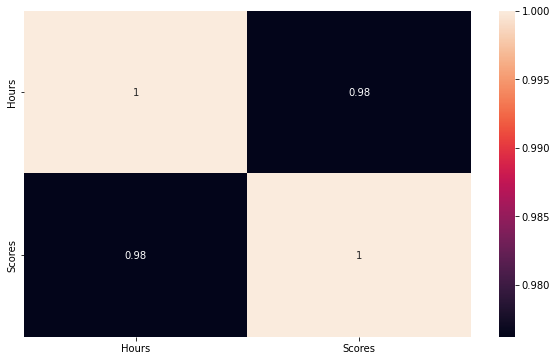

In [129]:
#import heatmap
sns.heatmap(df.corr(), annot=True)
# the darker shades of the chart represent higher values than the lighter shade

Boxplot

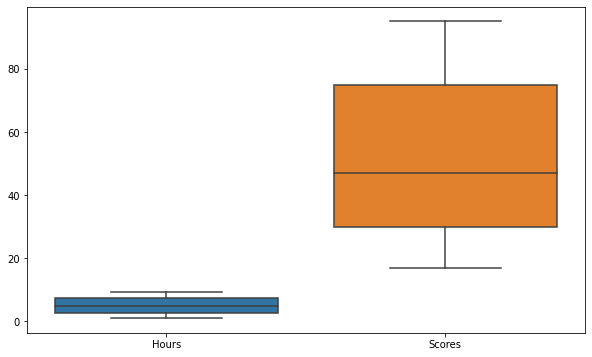

In [130]:
#Boxplot
sns.boxplot(data=df)

Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f587c863820>,
      dtype=object)

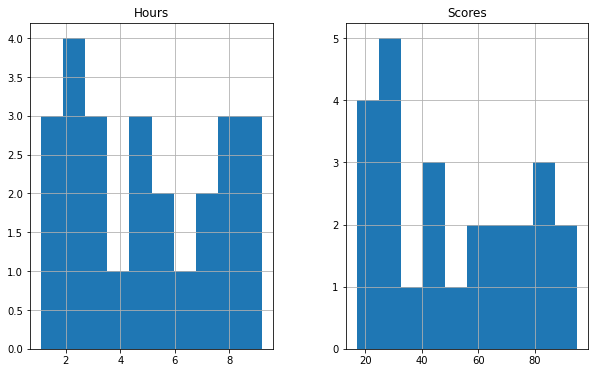

In [131]:
df.hist(figsize=(10,6))

Plotting Dataset

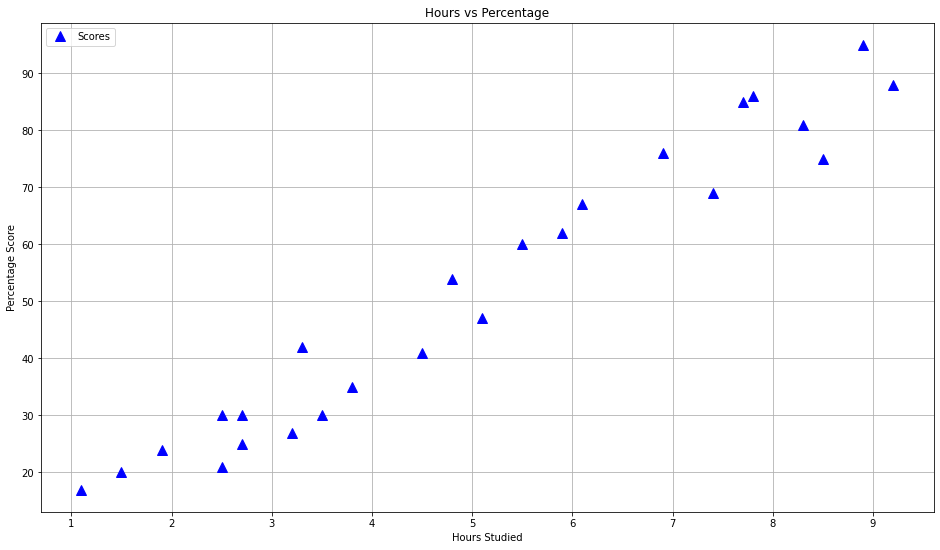

In [132]:
#plotting the dataset
plt.rcParams['figure.figsize'] = [16,9]
df.plot(x='Hours', y='Scores', style='^', color='blue', markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [133]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [134]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [135]:
X=df.iloc[:, :1].values
y=df.iloc[:, 1:].values

Train test split

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17, 1)
(8, 1)


Linear Regression algorithm

In [140]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()


In [141]:
lr.fit(X_train, y_train)

LinearRegression()

In [142]:
prediction=lr.predict(X_test)

Visualization of train data

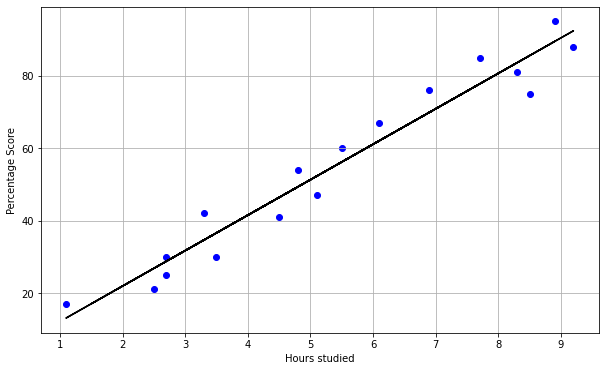

In [143]:
#Visualizion
line = lr.coef_*X + lr.intercept_

#plotting training data
plt.rcParams['figure.figsize'] = [10,6]
plt.scatter(X_train, y_train, color='b')
plt.plot(X, line, color='black');
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

Visualization of test data

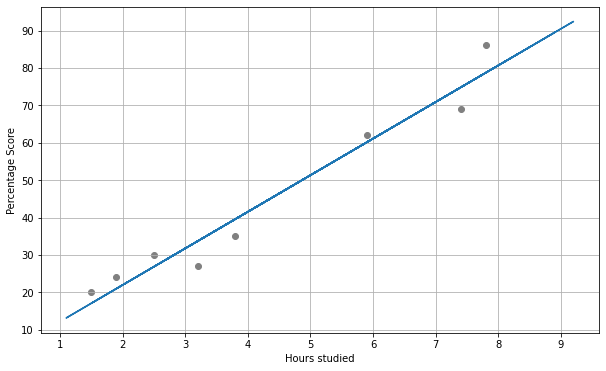

In [144]:
#plotting test data
plt.rcParams['figure.figsize'] = [10,6]
plt.scatter(X_test, y_test, color='grey')
plt.plot(X, line);
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [145]:
#predecting scores
print(X_test)
y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [146]:
#actual vs predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86]])

In [147]:
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

Actual vs Prediction

In [148]:
#actual vs predicted 
comp = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86]]","[[17.053665412465456], [33.69422877993883], [7..."


In [149]:
#testing own data

hours = 9.25
own_pred = lr.predict([[hours]])
print('The predicted score if a person studies for', hours, 'hours is', own_pred[0])

The predicted score if a person studies for 9.25 hours is [92.91505723]


Eveluating Data

In [150]:
#Eveluating the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027651
